Successfully Find: data\19_MM.pickle
Frame 5000 Wallclock  is: 2024-01-15 09:54:04.643677
Frame: 5000，Single Person
3D pose data（x, y, z, confidence）：
  joint  0: x=-184.98, y=-482.96, z=2703.16, conf=2.00
  joint  1: x=-191.94, y=-619.48, z=2608.17, conf=2.00
  joint  2: x=-194.98, y=-728.17, z=2531.45, conf=2.00
  joint  3: x=-245.22, y=-908.58, z=2454.19, conf=2.00
  joint  4: x=-252.97, y=-864.71, z=2443.84, conf=2.00
  joint  5: x=-329.76, y=-762.68, z=2405.29, conf=2.00
  joint  6: x=-374.98, y=-521.63, z=2484.88, conf=2.00
  joint  7: x=-433.28, y=-348.87, z=2601.46, conf=2.00
  joint  8: x=-500.24, y=-338.91, z=2660.53, conf=0.00
  joint  9: x=-554.53, y=-327.72, z=2744.75, conf=0.00
  joint 10: x=-538.24, y=-361.65, z=2665.44, conf=0.00
  joint 11: x=-219.34, y=-892.73, z=2488.85, conf=2.00
  joint 12: x=-157.07, y=-913.30, z=2592.57, conf=2.00
  joint 13: x=-53.40, y=-717.08, z=2733.21, conf=2.00
  joint 14: x=-57.20, y=-528.21, z=2844.30, conf=2.00
  joint 15: x=-80.59, y=-4

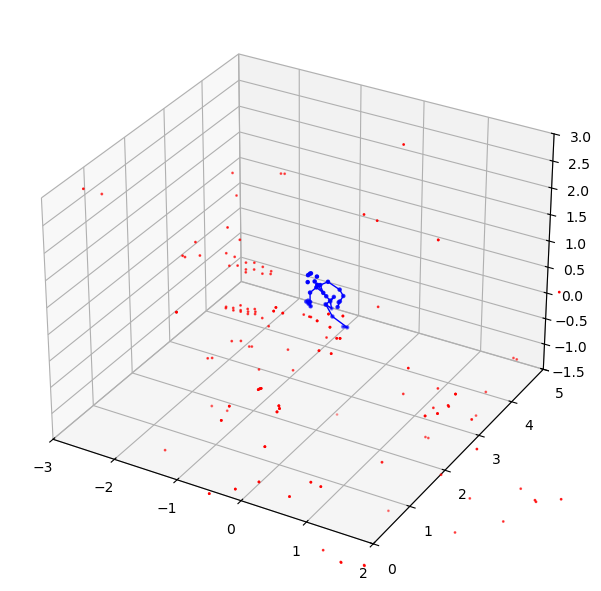

In [1]:
import os
import pickle
import numpy as np
from parsers import parse_poses3d
from plot_utils import plot_pc_3d

# ========= 用户输入：修改以下两个值 =========
pickle_filename = "19_MM.pickle"      # 🟡 改成你自己的文件名
frame_idx = 5000                   # 🟡 想查看的帧编号
# ===========================================

# 构建文件路径
data_path = os.path.join("data", pickle_filename)

# 检查文件是否存在
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Cannot Find: {data_path}")
else:
    print(f"Successfully Find: {data_path}")

# 加载 .pkl 文件
with open(data_path, "rb") as handle:
    data = pickle.load(handle)

# 获取指定帧
frame = data[frame_idx]
poses3d_raw = parse_poses3d(frame['poses3d'])
pc = frame['pc']  # 点云

# ========== ✅ 输出时间戳 ==========
wallclock = frame.get('wallclock', None)
if wallclock:
    print(f"Frame {frame_idx} Wallclock  is: {wallclock}")


# ================================
#   可视化 & 输出
# ================================

if poses3d_raw is not None and len(poses3d_raw) == 1:
    pose = poses3d_raw[0]                      # shape: (32, 4)
    pose = np.expand_dims(pose, axis=0)        # shape: (1, 32, 4)

    # 输出数值
    print(f"Frame: {frame_idx}，Single Person")
    print("3D pose data（x, y, z, confidence）：")
    for i, (x, y, z, c) in enumerate(pose[0]):
        print(f"  joint {i:2d}: x={x:.2f}, y={y:.2f}, z={z:.2f}, conf={c:.2f}")

    # 绘图
    plot_pc_3d(pc, pose)
else:
    print(f"Not Single Person")


In [8]:
import os
import pickle
import numpy as np
from parsers import parse_poses3d

pickle_filename = "19_MM.pickle"
data_path = os.path.join("data", pickle_filename)

with open(data_path, "rb") as handle:
    data = pickle.load(handle)

all_poses = []   # 存放所有帧
for idx, frame in enumerate(data):
    poses3d_raw = parse_poses3d(frame['poses3d'])
    if poses3d_raw is not None and len(poses3d_raw) == 1:  # 单人
        all_poses.append(poses3d_raw[0])   # (32,4)
    else:
        all_poses.append(np.zeros((32,4))) # 没检测到人，补零

all_poses = np.stack(all_poses, axis=0)  # (T, 32, 4)
print("Final shape:", all_poses.shape)


Final shape: (33955, 32, 4)


KeyboardInterrupt: 

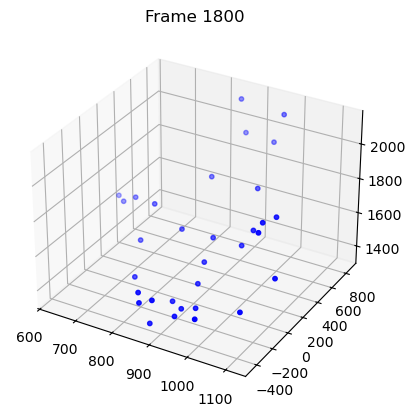

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import time

def play_sequence(seq, every=30, sleep=0.05):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for t in range(0, seq.shape[0], every):
        ax.cla()
        x, y, z, c = seq[t].T
        ax.scatter(x, y, z, c='b', s=10)
        ax.set_title(f"Frame {t}")
        display(fig)
        clear_output(wait=True)
        time.sleep(sleep)

play_sequence(all_poses, every=100, sleep=0.05)




ValueError: all input arrays must have the same shape